In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spotipy
from sklearn.preprocessing import StandardScaler
import spotipy
import spotipy.util as util
import glob
import collections

In [2]:
username='***'
client_id='***'
client_secret='***'
redirect_uri='***'
scope = '***'

token = util.prompt_for_user_token(username, scope, client_id, client_secret, redirect_uri)
spotify = spotipy.Spotify(auth=token)

In [3]:
df = pd.read_csv('Songs/songs0.csv')

This document demonstrates an example EDA using API features.

Because of the runtime, EDA is only performed on songs0.csv first. We plan on adding API features on all csv files later and saving them.

## Use API to include track features
### popularity, is_local

In [156]:
num=20
features=[]
for i in range(len(df.track_uri)//num+1):
    if (i==len(df.track_uri)//num):
        features+=spotify.tracks(df.track_uri[i*num:])['tracks']
    else:
        features+=spotify.tracks(df.track_uri[i*num:(i+1)*num])['tracks']

In [172]:
popularity=[]
for i in features:
    if i==None:
        popularity.append(0)
    else:
        popularity.append(i['popularity'])

In [173]:
is_local=[]
for i in features:
    if i==None:
        is_local.append(True)
    else:
        is_local.append(i['is_local'])

In [206]:
df0=df2.copy()
df0['popularity']=popularity
df0['is_local']=is_local

In [207]:
df0.head()

,Unnamed: 0,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,...,pop,poprap,poprock,post-teenpop,rap,rock,southernhiphop,trap,popularity,is_local
0,0,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,1,1,0,0,1,0,0,0,68,False
1,1,0,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,...,1,0,0,1,0,0,0,0,79,False
2,2,0,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),...,1,0,0,0,0,0,0,0,30,False
3,3,0,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,...,1,1,0,0,0,0,0,0,73,False
4,4,0,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,...,0,0,0,0,0,0,0,0,16,False


## Use API to include audio features
### danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo

In [18]:
def get_track_features(df):
    df_new=df.copy()
    features=[]
    for i in range(len(df)//100+1):
        if (i==len(df)//100):
            features+=spotify.audio_features(df.track_uri[i*100:])
        else:
            features+=spotify.audio_features(df.track_uri[i*100:(i+1)*100])
    df_new['danceability']=[i['danceability'] for i in features]
    df_new['energy']=[i['energy'] for i in features]
    df_new['key']=[i['key'] for i in features]
    df_new['loudness']=[i['loudness'] for i in features]
    df_new['mode']=[i['mode'] for i in features]
    df_new['speechiness']=[i['speechiness'] for i in features]
    df_new['acousticness']=[i['acousticness'] for i in features]
    df_new['instrumentalness']=[i['instrumentalness'] for i in features]
    df_new['liveness']=[i['liveness'] for i in features]
    df_new['valence']=[i['valence'] for i in features]
    df_new['tempo']=[i['tempo'] for i in features]
    return df_new

In [195]:
#df1 = get_track_features(df0)
df1 = pd.read_csv('Songs_new/songs0_0.csv')
df1.head()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461
1,0,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040
2,0,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259
3,0,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,0.891,0.714,4,-6.055,0,0.1400,0.20200,0.000234,0.0521,0.818,100.972
4,0,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759


In [196]:
df1.describe()

,pid,pos,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,67503.000000,67503.000000,6.750300e+04,67503.00000,67503.000000,67503.000000,67503.000000,67503.000000,67503.000000,67503.000000,67503.000000,67503.000000,67503.000000,67503.000000
mean,508.371317,55.638223,2.331839e+05,0.60863,0.644099,5.173207,-7.216273,0.662134,0.096540,0.234632,0.049375,0.189813,0.496481,121.720721
std,286.288365,49.051327,6.455234e+04,0.16024,0.208050,3.609368,3.523497,0.472986,0.103052,0.276553,0.175016,0.155253,0.237725,28.906786
min,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,262.000000,17.000000,1.984130e+05,0.50200,0.511000,2.000000,-8.640000,0.000000,0.035900,0.021900,0.000000,0.094500,0.308000,99.099000
50%,505.000000,41.000000,2.248660e+05,0.61700,0.672000,5.000000,-6.472000,1.000000,0.051200,0.108000,0.000003,0.126000,0.491000,120.462000
75%,752.000000,82.000000,2.580400e+05,0.72500,0.807000,8.000000,-4.911500,1.000000,0.107000,0.365000,0.000567,0.242000,0.683000,140.030000
max,999.000000,244.000000,2.424189e+06,0.98800,1.000000,11.000000,2.766000,1.000000,0.962000,0.996000,0.995000,1.000000,0.998000,232.690000


## Use API to include artist features
### genres, popularity, followers

In [42]:
def get_artist_features(df, num):
    df_new=df.copy()
    features=[]
    for i in range(len(df.artist_uri)//num+1):
        if (i==len(df.artist_uri)//num):
            features+=spotify.artists(df.artist_uri[i*num:])['artists']
        else:
            features+=spotify.artists(df.artist_uri[i*num:(i+1)*num])['artists']
    df_new['artist_popularity']=[i['popularity'] for i in features]
    df_new['artist_genres']=[i['genres'] for i in features]
    df_new['artist_followers']=[i['followers']['total'] for i in features]

    return df_new

In [13]:
#df2 = get_artist_features(df1,20)
#df2.head()
df2 = pd.read_csv('songs0_0.csv')
df2.head()

,Unnamed: 0,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_popularity,artist_genres,artist_followers
0,0,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,78,"['dance pop', 'hip hop', 'hip pop', 'pop', 'po...",1186038
1,1,0,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,...,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,82,"['dance pop', 'pop', 'post-teen pop']",6667521
2,2,0,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),...,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,89,"['dance pop', 'pop', 'r&b']",20812843
3,3,0,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,...,0,0.1400,0.20200,0.000234,0.0521,0.818,100.972,82,"['dance pop', 'pop', 'pop rap']",8441316
4,4,0,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,...,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,74,"['dance pop', 'reggae fusion']",1231617


In [14]:
genres=[]
list_genres=[]
for i in range(len(df2)):
    li=df2.artist_genres.iloc[i].replace('\'','').replace('[','').replace(']','').replace(' ','').split(',')
    genres+=li
    list_genres.append(li)
df2['artist_genres']=list_genres

In [15]:
counts = collections.Counter(genres)
new_list = sorted(genres, key=counts.get, reverse=True)

In [16]:
tops = np.unique(np.array(new_list[:100000]))
tops
#These are the top 12 genres

array(['contemporarycountry', 'dancepop', 'hiphop', 'modernrock', 'pop',
       'poprap', 'poprock', 'post-teenpop', 'rap', 'rock',
       'southernhiphop', 'trap'], dtype='<U19')

In [17]:
#convert these 12 genres to one-hot
for i in tops:
    df2[i]=[1 if i in genre else 0 for genre in df2.artist_genres]

In [18]:
df2.head()

,Unnamed: 0,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,...,hiphop,modernrock,pop,poprap,poprock,post-teenpop,rap,rock,southernhiphop,trap
0,0,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,1,0,1,1,0,0,1,0,0,0
1,1,0,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,...,0,0,1,0,0,1,0,0,0,0
2,2,0,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),...,0,0,1,0,0,0,0,0,0,0
3,3,0,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,...,0,0,1,1,0,0,0,0,0,0
4,4,0,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,...,0,0,0,0,0,0,0,0,0,0


## Use API to include album features
### popularity, release date, and genre

In [19]:
def get_album_features(df, num):
    df_new=df.copy()
    features=[]
    for i in range(len(df.album_uri)//num+1):
        if (i==len(df.album_uri)//num):
            features+=spotify.albums(df.album_uri[i*num:])
        else:
            features+=spotify.albums(df.album_uri[i*num:(i+1)*num])
    df_new['album_popularity']=[i['popularity'] for i in features]
    df_new['album_release_date']=[i['release_date'] for i in features]
    df_new['album_genre']=[i['genre'] for i in features]

    return df_new

In [1]:
#df3 = get_album_features(df2,20 )
#df3.head()

# EDA using API features

In [208]:
df_new=df0.copy()

In [5]:
df_new[['duration_ms', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'artist_popularity',
       'artist_followers','popularity']].describe()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_popularity,artist_followers,popularity
count,6.750300e+04,67503.00000,67503.000000,67503.000000,67503.000000,67503.000000,67503.000000,67503.000000,67503.000000,67503.000000,67503.000000,67503.000000,67503.000000,6.750300e+04,67503.000000
mean,2.331839e+05,0.60863,0.644099,5.173207,-7.216273,0.662134,0.096540,0.234632,0.049375,0.189813,0.496481,121.720721,70.519562,4.508248e+06,44.075345
std,6.455234e+04,0.16024,0.208050,3.609368,3.523497,0.472986,0.103052,0.276553,0.175016,0.155253,0.237725,28.906786,17.311314,8.200381e+06,25.452528
min,0.000000e+00,0.00000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.984130e+05,0.50200,0.511000,2.000000,-8.640000,0.000000,0.035900,0.021900,0.000000,0.094500,0.308000,99.099000,62.000000,2.563840e+05,22.000000
50%,2.248660e+05,0.61700,0.672000,5.000000,-6.472000,1.000000,0.051200,0.108000,0.000003,0.126000,0.491000,120.462000,73.000000,1.293608e+06,50.000000
75%,2.580400e+05,0.72500,0.807000,8.000000,-4.911500,1.000000,0.107000,0.365000,0.000567,0.242000,0.683000,140.030000,83.000000,4.753494e+06,66.000000
max,2.424189e+06,0.98800,1.000000,11.000000,2.766000,1.000000,0.962000,0.996000,0.995000,1.000000,0.998000,232.690000,100.000000,5.415440e+07,88.000000


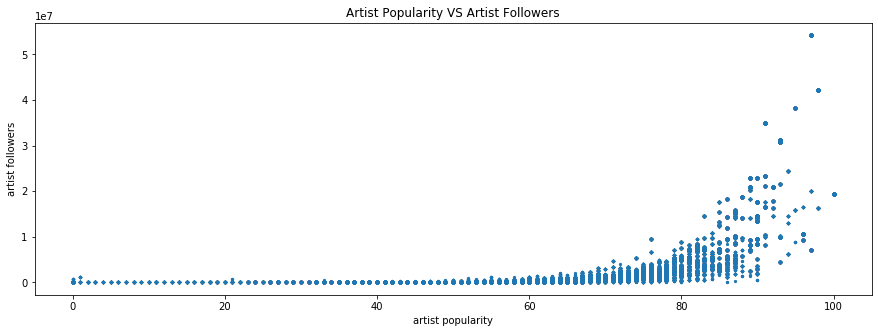

In [67]:
plt.subplots(figsize=(15,5))
plt.scatter(df_new.artist_popularity,df_new.artist_followers,s=5)
plt.title('Artist Popularity VS Artist Followers')
plt.xlabel('artist popularity')
plt.ylabel('artist followers')
plt.savefig('artist.png')

By plotting popularity of artists and followers, there exist a positive correlation between these two variables.

In [7]:
plot_columns=['danceability',
 'energy',
 'loudness',
 'speechiness',
 'instrumentalness']

In [8]:
def feature_by_genre(genres,columns):
    genre_features=[]
    for i in columns:
        #Different genres, mean of this feature
        li = []
        for j in genres:
            li.append(np.mean(df_new[df_new[j]==1][i]))
        genre_features.append(li)
    return genre_features

In [21]:
genre_features=feature_by_genre(tops,plot_columns)

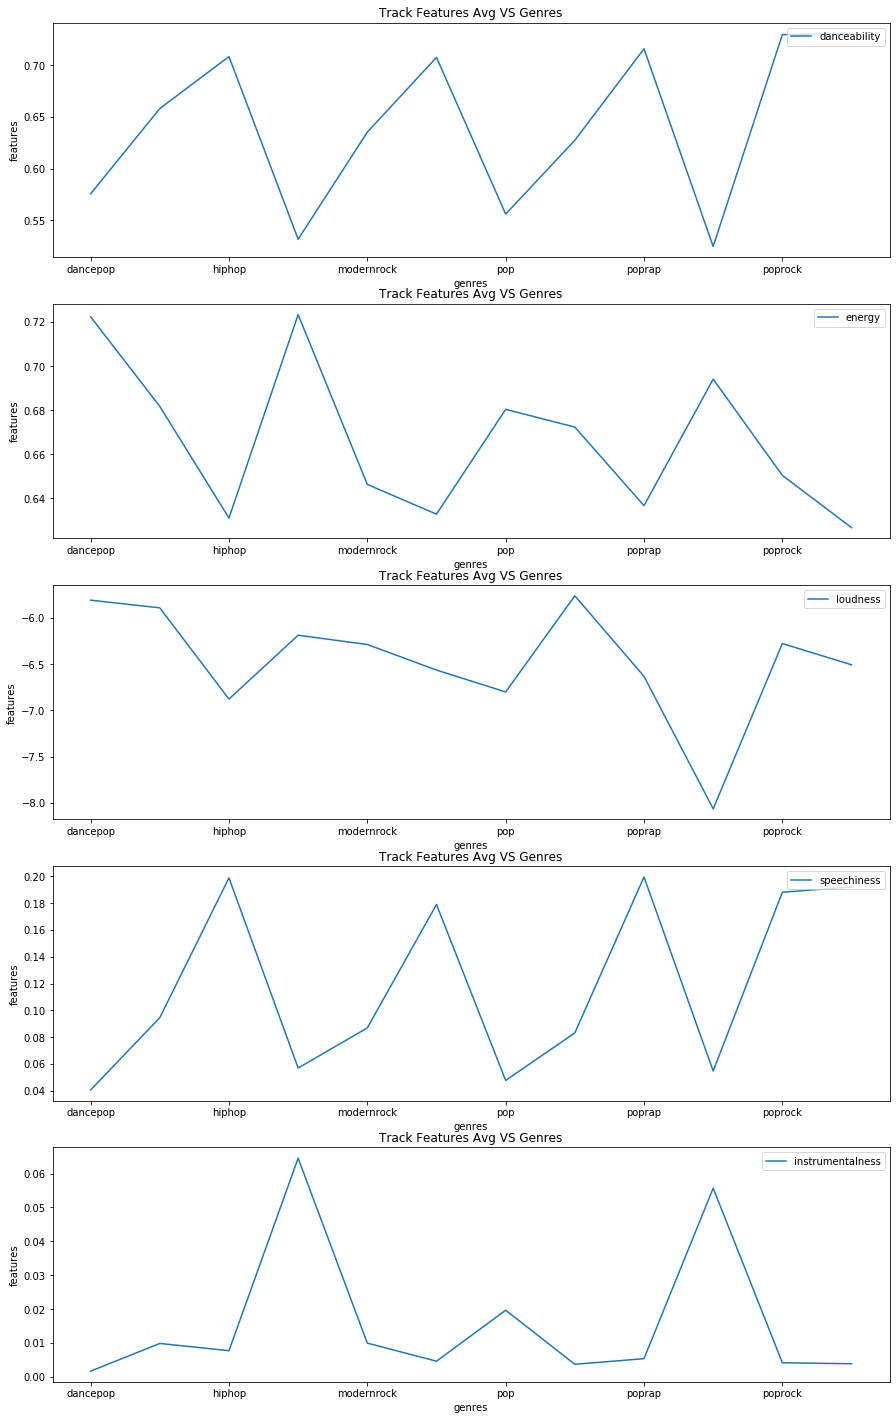

In [23]:
fig, ax = plt.subplots(len(plot_columns),figsize=(15,25))
for i in range(len(plot_columns)):
    ax[i].plot(genre_features[i],label=plot_columns[i])
    ax[i].set_xticklabels(tops)
    ax[i].legend(loc='upper right')
    ax[i].set_title('Track Features Avg VS Genres')
    ax[i].set_xlabel("genres")
    ax[i].set_ylabel('features')
plt.show()

From here, we could see that genres are correlated with some of the track features. Danceability feature and Speechiness feature is likely to be correlated

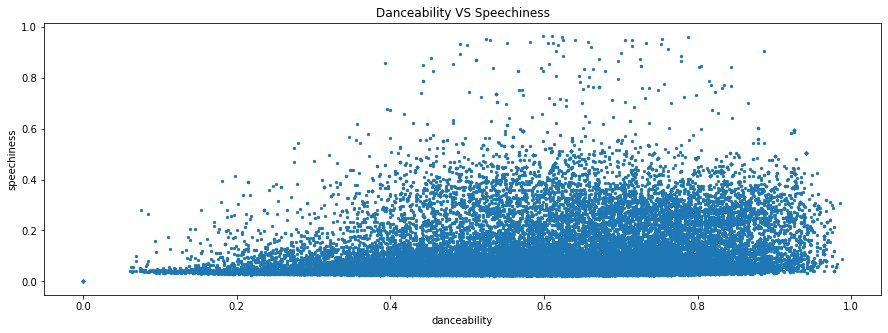

In [221]:
plt.subplots(figsize=(15,5))
plt.scatter(df_new.danceability,df_new.speechiness,s=5)

plt.title('Danceability VS Speechiness')
plt.xlabel('danceability')
plt.ylabel('speechiness')
plt.show()

There're less correlation between Danceability and Speechiness. Therefore, the only observation is that the speechy genres of music tend to be very danceable, too.

In [ ]:
'loudness',  'popularity'

In [33]:
features = ['danceability','energy', 'speechiness','instrumentalness']

danceability
energy
speechiness
instrumentalness


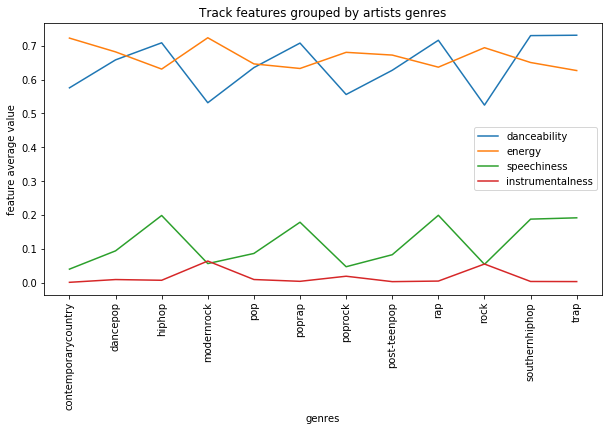

In [43]:
plt.subplots(figsize=(10,5))
for name in features:
    print(name)
    popularity_by_genre = feature_by_genre(tops,[name])
    plt.plot(popularity_by_genre[0], label = str(name))
plt.xticks(range(12),tops, rotation = 90)
plt.xlabel('genres')
plt.ylabel('feature average value')
plt.legend()
plt.title('Track features grouped by artists genres')
plt.savefig('Track feature value.png')

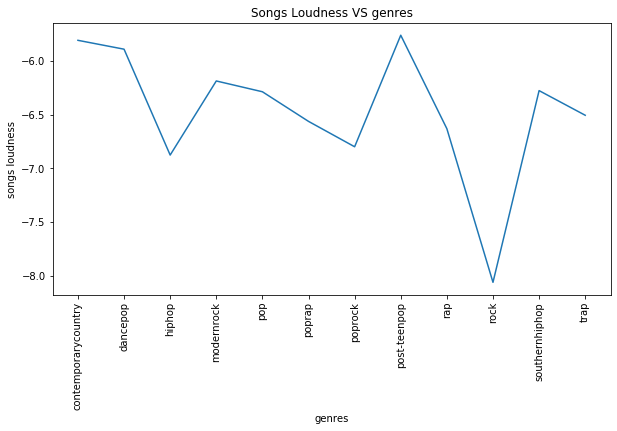

In [54]:
popularity_by_genre = feature_by_genre(tops,['loudness'])
plt.subplots(figsize=(10,5))
plt.plot(popularity_by_genre[0])
plt.xticks(range(12),tops, rotation = 90)
plt.xlabel('genres')
plt.ylabel('songs loudness')
plt.title('Songs Loudness VS genres')
plt.savefig('loudness.png')

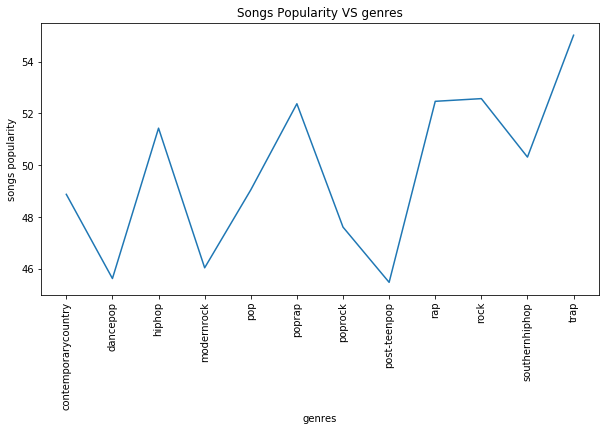

In [50]:
popularity_by_genre = feature_by_genre(tops,['popularity'])
plt.subplots(figsize=(10,5))
plt.plot(popularity_by_genre[0])
plt.xticks(range(12),tops, rotation = 90)
plt.xlabel('genres')
plt.ylabel('songs popularity')
plt.title('Songs Popularity VS genres')
plt.savefig('popularity.png')

Here, we could also see that song popularity and track genre is very correlated. Genres such as hiphop, poprap, rap, rock, and trap have very popular artists, whereas dance pop, modern rock and post-teen pop have less popularity.

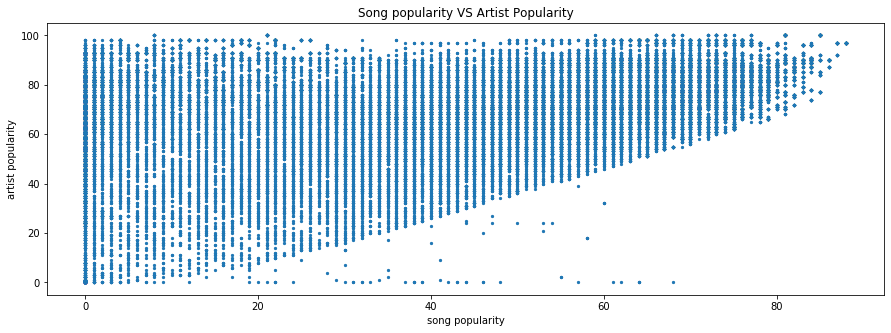

In [66]:
plt.subplots(figsize=(15,5))
plt.scatter(df_new['popularity'],df_new['artist_popularity'],s=5)
plt.xlabel('song popularity')
plt.ylabel('artist popularity')
plt.title('Song popularity VS Artist Popularity')
plt.savefig('popular.png')

Here, we could see that less popular artists tend to have less popular songs

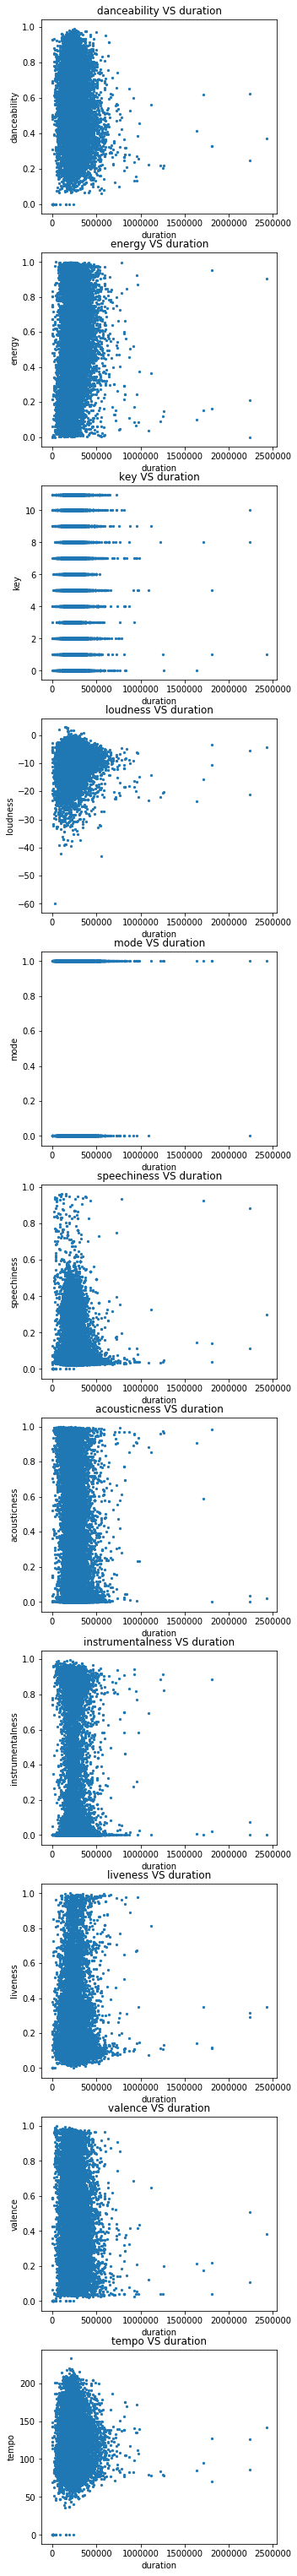

In [225]:
cols = ['danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
fig,ax=plt.subplots(len(cols),figsize=(5,55))
for i in range(len(cols)):
    ax[i].scatter(df_new.duration_ms,df_new[cols[i]],s=5)
    ax[i].set_title(cols[i]+' VS duration')
    ax[i].set_xlabel('duration')
    ax[i].set_ylabel(cols[i])
plt.show()

Loudness and speechiness features have slight correlation with duration_ms.

As tracks become louder, duration decrease.

As tracks become more speechy, duration increase.

In [226]:
df_new.to_csv('Songs_new/songs0_3.csv')

In [4]:
df_new = pd.read_csv('songs0_3.csv')

In [55]:
from pandas.plotting import scatter_matrix

In [57]:
df_new.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'pid', 'pos', 'artist_name', 'track_uri',
       'artist_uri', 'track_name', 'album_uri', 'duration_ms', 'album_name',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'artist_popularity', 'artist_genres', 'artist_followers',
       'contemporarycountry', 'dancepop', 'hiphop', 'modernrock', 'pop',
       'poprap', 'poprock', 'post-teenpop', 'rap', 'rock', 'southernhiphop',
       'trap', 'popularity', 'is_local'],
      dtype='object')

In [64]:
matrix_features = ['danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']

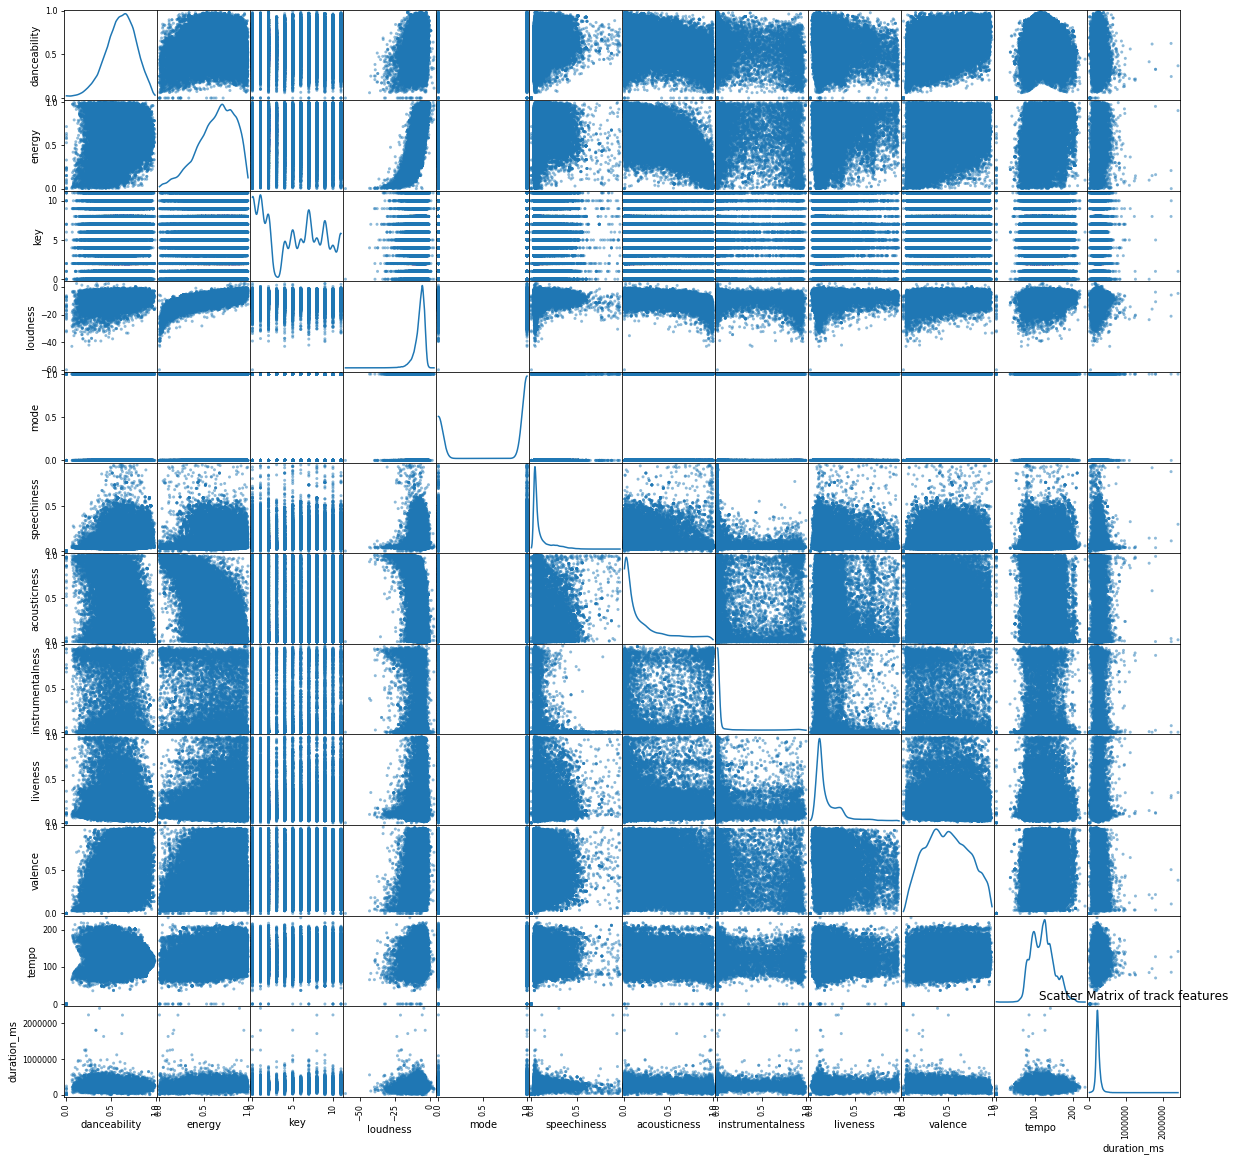

In [65]:
scatter_matrix(df_new[matrix_features],figsize=(20,20), diagonal='kde')
plt.title('Scatter Matrix of track features')
plt.savefig('scattermatrix.png')